# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import root_mean_squared_error

# Main results

In [2]:
# Read data
test_rf = pd.read_csv('output/supervised_tuning/test_results_rf.csv')
test_rf['Model'] = "RF"
test_xgboost = pd.read_csv('output/supervised_tuning/test_results_xgboost.csv')
test_xgboost['Model'] = "XGBoost"
test_elasticNet = pd.read_csv('output/supervised_tuning/test_results_elasticNet.csv')
test_elasticNet['Model'] = "ElasticNet"

In [8]:
# R2
from sklearn.metrics import r2_score
from scipy.stats import linregress
round(pearsonr(test_rf.assets_true, test_rf.assets_all)[0]**2, 2)

0.72

In [4]:
# Satellite
elasticNet = {
    'model': 'Satellite ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_sat), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_sat), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_sat), 2),
}
rf = {
    'model': 'Satellite rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_sat), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_sat), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_sat), 2),
}
xgboost = {
    'model': 'Satellite xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_sat), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_sat), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_sat), 2),
}
satellite = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [5]:
# Outdoor
elasticNet = {
    'model': 'Outdoor ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_outdoor), 2),
}
rf = {
    'model': 'Outdoor rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_outdoor), 2),
}
xgboost = {
    'model': 'Outdoor xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_outdoor), 2),
}
outdoor = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [6]:
# Complete
elasticNet = {
    'model': 'Complete ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_all), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_all), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_all), 2),
}
rf = {
    'model': 'Complete rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_all), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_all), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_all), 2),
}
xgboost = {
    'model': 'Complete xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_all), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_all), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_all), 2),
}
complete = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [7]:
finaltable =  pd.concat([satellite, outdoor, complete])
finaltable = finaltable.style.format(decimal='.', thousands=',', precision=2).hide(axis="index")
finaltable

model,assets_r,assets_p,assets_rmse,exp_r,exp_p,exp_rmse,inc_r,inc_p,inc_rmse
Satellite ElasticNet,0.47,0.44,0.46,0.34,0.31,"5,592.71",0.21,0.28,"12,148.00"
Satellite rf,0.55,0.52,0.43,0.38,0.35,"5,508.20",0.24,0.31,"12,074.77"
Satellite xgboost,0.55,0.51,0.44,0.36,0.34,"5,538.77",0.23,0.29,"12,138.05"
Outdoor ElasticNet,0.69,0.69,0.39,0.46,0.43,"5,288.28",0.33,0.34,"11,778.49"
Outdoor rf,0.71,0.70,0.37,0.48,0.44,"5,223.62",0.33,0.40,"11,766.68"
Outdoor xgboost,0.70,0.69,0.38,0.47,0.43,"5,243.45",0.33,0.38,"11,804.78"
Complete ElasticNet,0.84,0.84,0.31,0.59,0.53,"4,794.78",0.42,0.48,"11,374.23"
Complete rf,0.85,0.85,0.28,0.62,0.58,"4,664.39",0.47,0.50,"11,261.17"
Complete xgboost,0.84,0.84,0.28,0.61,0.57,"4,765.31",0.39,0.48,"11,536.06"


In [1]:
# print(finaltable.to_latex())

In [9]:
del(finaltable, test_rf, test_xgboost, test_elasticNet)

# No finetuning

In [10]:
# Read data
test_rf = pd.read_csv('output/supervised_notuning/test_results_rf.csv')
test_rf['Model'] = "RF"
test_xgboost = pd.read_csv('output/supervised_notuning/test_results_xgboost.csv')
test_xgboost['Model'] = "XGBoost"
test_elasticNet = pd.read_csv('output/supervised_notuning/test_results_elasticNet.csv')
test_elasticNet['Model'] = "ElasticNet"

In [11]:
# Satellite
elasticNet = {
    'model': 'Satellite ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_sat), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_sat), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_sat), 2),
}
rf = {
    'model': 'Satellite rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_sat), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_sat), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_sat), 2),
}
xgboost = {
    'model': 'Satellite xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_sat)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_sat)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_sat), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_sat)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_sat)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_sat), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_sat)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_sat)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_sat), 2),
}
satellite = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [12]:
# Outdoor
elasticNet = {
    'model': 'Outdoor ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_outdoor), 2),
}
rf = {
    'model': 'Outdoor rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_outdoor), 2),
}
xgboost = {
    'model': 'Outdoor xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_outdoor)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_outdoor)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_outdoor), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_outdoor)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_outdoor)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_outdoor), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_outdoor)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_outdoor)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_outdoor), 2),
}
outdoor = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [13]:
# Complete
elasticNet = {
    'model': 'Complete ElasticNet',
    'assets_r': round(pearsonr(test_elasticNet.assets_true, test_elasticNet.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_elasticNet.assets_true, test_elasticNet.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_elasticNet.assets_true, test_elasticNet.assets_all), 2),
    'exp_r': round(pearsonr(test_elasticNet.exp_true, test_elasticNet.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_elasticNet.exp_true, test_elasticNet.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_elasticNet.exp_true, test_elasticNet.exp_all), 2),
    'inc_r': round(pearsonr(test_elasticNet.inc_true, test_elasticNet.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_elasticNet.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_elasticNet.inc_true, test_elasticNet.inc_all), 2),
}
rf = {
    'model': 'Complete rf',
    'assets_r': round(pearsonr(test_rf.assets_true, test_rf.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_rf.assets_true, test_rf.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_rf.assets_true, test_rf.assets_all), 2),
    'exp_r': round(pearsonr(test_rf.exp_true, test_rf.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_rf.exp_true, test_rf.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_rf.exp_true, test_rf.exp_all), 2),
    'inc_r': round(pearsonr(test_rf.inc_true, test_rf.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_rf.inc_true, test_rf.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_rf.inc_true, test_rf.inc_all), 2),
}
xgboost = {
    'model': 'Complete xgboost',
    'assets_r': round(pearsonr(test_xgboost.assets_true, test_xgboost.assets_all)[0], 2),
    'assets_p': round(spearmanr(test_xgboost.assets_true, test_xgboost.assets_all)[0], 2),
    'assets_rmse': round(root_mean_squared_error(test_xgboost.assets_true, test_xgboost.assets_all), 2),
    'exp_r': round(pearsonr(test_xgboost.exp_true, test_xgboost.exp_all)[0], 2),
    'exp_p': round(spearmanr(test_xgboost.exp_true, test_xgboost.exp_all)[0], 2),
    'exp_rmse': round(root_mean_squared_error(test_xgboost.exp_true, test_xgboost.exp_all), 2),
    'inc_r': round(pearsonr(test_xgboost.inc_true, test_xgboost.inc_all)[0], 2),
    'inc_p': round(spearmanr(test_xgboost.inc_true, test_xgboost.inc_all)[0], 2),
    'inc_rmse': round(root_mean_squared_error(test_xgboost.inc_true, test_xgboost.inc_all), 2),
}
complete = pd.concat([pd.DataFrame(elasticNet, index=[0]),  pd.DataFrame(rf, index=[0]), pd.DataFrame(xgboost, index=[0])])
del(elasticNet, rf, xgboost)

In [14]:
finaltable =  pd.concat([satellite, outdoor, complete])
finaltable = finaltable.style.format(decimal='.', thousands=',', precision=2).hide(axis="index")
finaltable

model,assets_r,assets_p,assets_rmse,exp_r,exp_p,exp_rmse,inc_r,inc_p,inc_rmse
Satellite ElasticNet,0.39,0.37,0.49,0.30,0.28,"5,731.24",0.16,0.21,"12,263.25"
Satellite rf,0.51,0.47,0.45,0.28,0.28,"5,768.68",0.20,0.27,"12,177.29"
Satellite xgboost,0.51,0.48,0.45,0.29,0.29,"5,714.68",0.16,0.22,"12,339.61"
Outdoor ElasticNet,0.60,0.61,0.44,0.42,0.43,"5,412.28",0.30,0.32,"11,861.71"
Outdoor rf,0.70,0.70,0.38,0.45,0.44,"5,298.78",0.28,0.33,"11,977.49"
Outdoor xgboost,0.70,0.70,0.38,0.42,0.44,"5,409.53",0.25,0.38,"12,058.84"
Complete ElasticNet,0.75,0.75,0.37,0.60,0.52,"4,753.20",0.43,0.29,"11,324.20"
Complete rf,0.84,0.84,0.30,0.61,0.55,"4,779.78",0.43,0.45,"11,508.91"
Complete xgboost,0.84,0.83,0.30,0.58,0.51,"4,882.57",0.38,0.47,"11,667.06"


In [2]:
# print(finaltable.to_latex())

In [16]:
del(finaltable, test_rf, test_xgboost, test_elasticNet)

# Scatterplot

In [17]:
# Read data
test_rf = pd.read_csv('output/supervised_tuning/test_results_rf.csv')
test_rf['Algorithm'] = "RF"
test_xgboost = pd.read_csv('output/supervised_tuning/test_results_xgboost.csv')
test_xgboost['Algorithm'] = "XGBoost"
test_elasticNet = pd.read_csv('output/supervised_tuning/test_results_elasticNet.csv')
test_elasticNet['Algorithm'] = "ElasticNet"

In [18]:
# True df
true_all = test_elasticNet[['household', 'assets_true', 'exp_true', 'inc_true']]
true_all = pd.melt(true_all, id_vars = ['household'], value_name='Observed')
true_all['Outcome'] = ['Assets' if ('assets' in i) else 'Expenditure' if ('exp' in i) else 'Income' for i in true_all['variable']]

In [19]:
# Model df
test_all = pd.concat([test_elasticNet, test_rf, test_xgboost])
test_all = test_all.loc[:,[False if 'true' in i else True for i in test_all.columns]]
test_all = pd.melt(test_all, id_vars = ['household', 'Algorithm'], value_name='Predicted')
test_all['Outcome'] = ['Assets' if ('assets' in i) else 'Expenditure' if ('exp' in i) else 'Income' for i in test_all['variable']]
test_all['Model'] = ['Satellite' if ('sat' in i) else 'Outdoor' if ('outd' in i) else 'Complete' for i in test_all['variable']]
test_all = test_all.drop('variable', axis=1)

In [20]:
# Merge
scatter = pd.merge(test_all, true_all, how='left', on=['household', 'Outcome'])

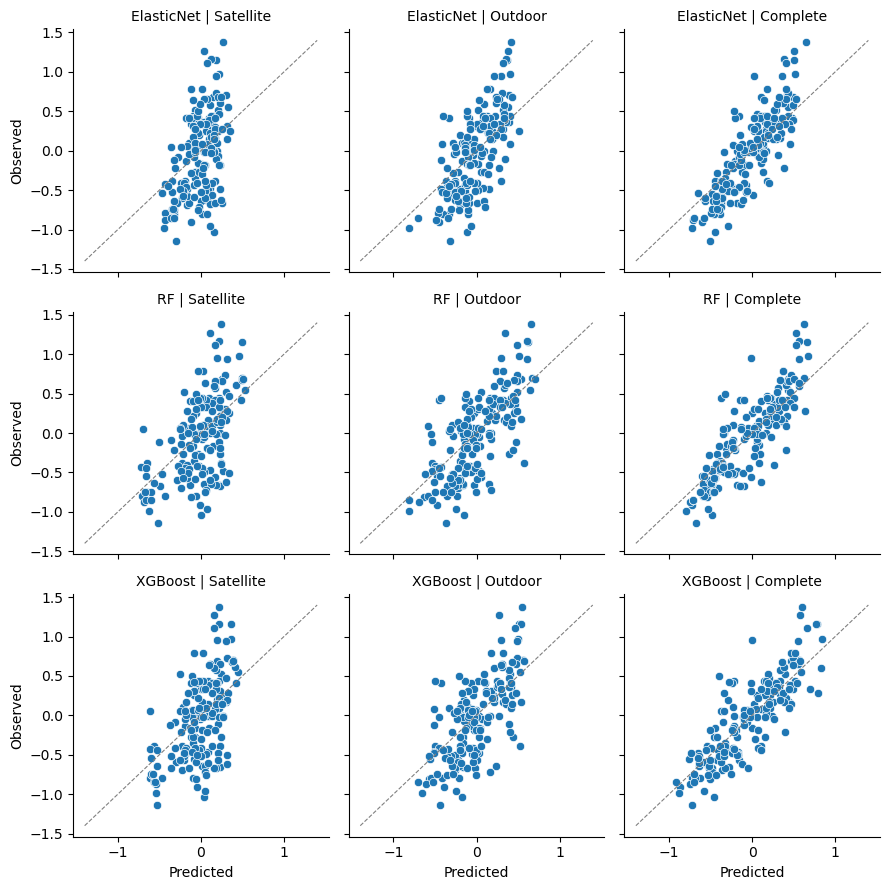

In [21]:
# Assets scatter
def const_line(*args, **kwargs):
    x = [-1.4, 1.4]
    y = [-1.4, 1.4]
    plt.plot(x, y, color='grey', linewidth=0.8, linestyle='dashed')
    
scatter_plot = scatter.loc[scatter.Outcome=='Assets']
g = sns.FacetGrid(scatter_plot, row='Algorithm', col='Model', height=3, aspect=1)
g.map(const_line)
g.map(sns.scatterplot, "Predicted", "Observed")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [22]:
# Write to disk
fig = g.fig
fig.savefig("figures/scatter_assets.png", dpi=300) 
del(g, fig, const_line, scatter_plot)

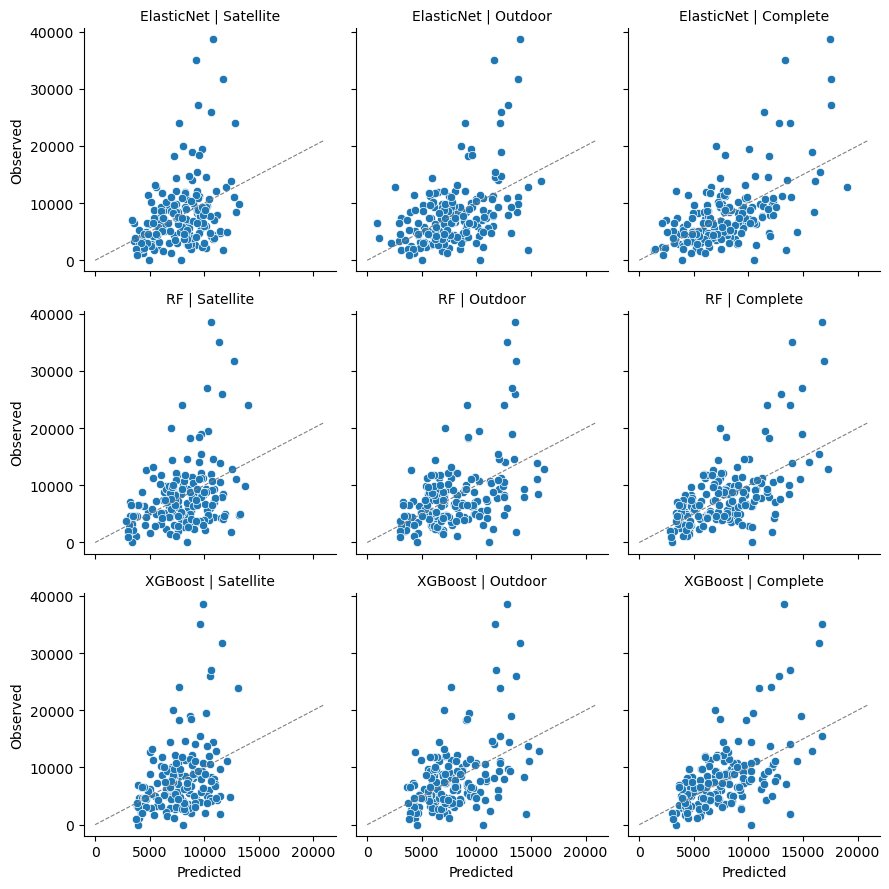

In [23]:
# Expenditure scatter
def const_line(*args, **kwargs):
    x = [0, 21000]
    y = [0, 21000]
    plt.plot(x, y, color='grey', linewidth=0.8, linestyle='dashed')
    
scatter_plot = scatter.loc[scatter.Outcome=='Expenditure']
g = sns.FacetGrid(scatter_plot, row='Algorithm', col='Model', height=3, aspect=1)
g.map(const_line)
g.map(sns.scatterplot, "Predicted", "Observed")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [24]:
# Write to disk
fig = g.fig
fig.savefig("figures/scatter_expenditure.png", dpi=300)
del(g, fig, const_line, scatter_plot)

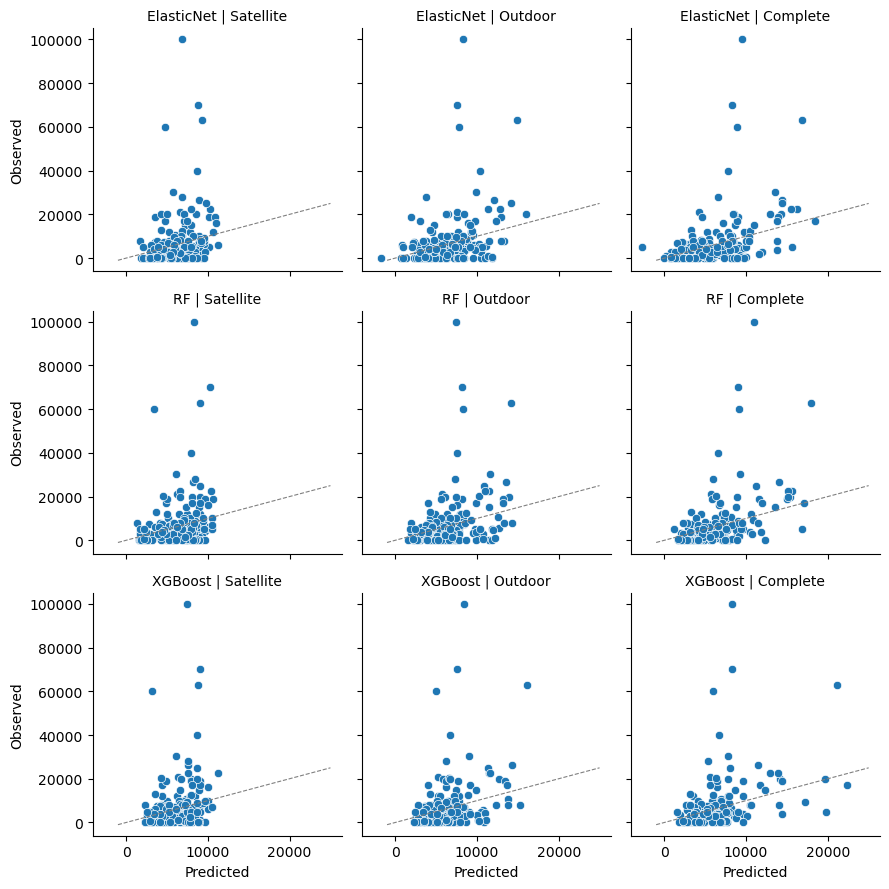

In [25]:
# Income scatter
def const_line(*args, **kwargs):
    x = [-1000, 25000]
    y = [-1000, 25000]
    plt.plot(x, y, color='grey', linewidth=0.8, linestyle='dashed')
    
scatter_plot = scatter.loc[scatter.Outcome=='Income']
g = sns.FacetGrid(scatter_plot, row='Algorithm', col='Model', height=3, aspect=1)
g.map(const_line)
g.map(sns.scatterplot, "Predicted", "Observed")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [26]:
# Write to disk
fig = g.fig
fig.savefig("figures/scatter_income.png", dpi=300)
del(g, fig, const_line, scatter_plot)